# Focusing on face

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Display two image
def display(a, b, title1='Original', title2='Edited'):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
    
# Display one image
def display_one(a, title1='Original'):
    plt.imshow(a), plt.title(title1)
    
    plt.show()

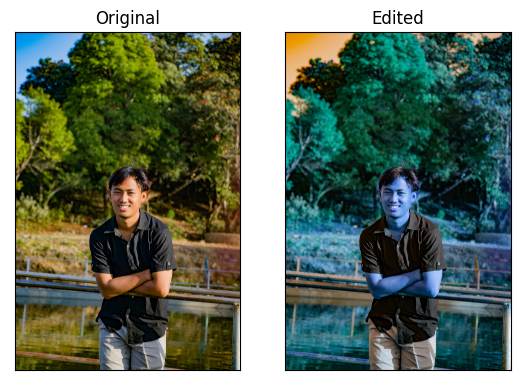

In [3]:
img = cv2.imread('prac.jpeg') # In BGR Format
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

display(original, img)

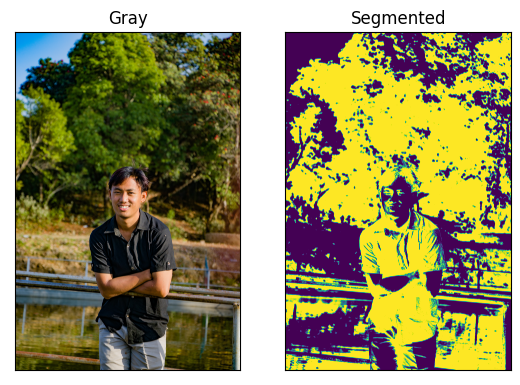

In [4]:
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY) # Convert to Greysacle

ret, thresh2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(original, thresh2, 'Gray', 'Segmented')

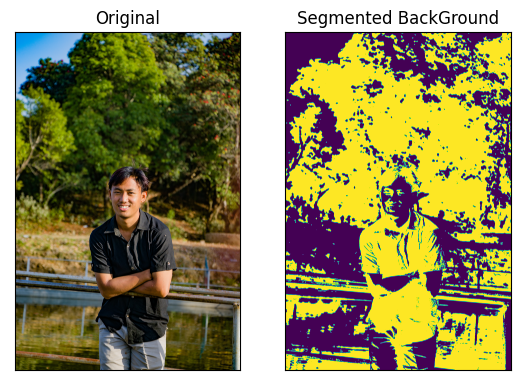

In [5]:
# Further noise renewal(Morphology)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel, iterations=1)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Displaying segmented back ground
display(original, sure_bg, 'Original', 'Segmented BackGround')